In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/signi/Downloads/iris.csv')

In [4]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
feature_columns = ['sepal.length', 'sepal.width', 'petal.length','petal.width']
X = data[feature_columns].values
y = data['species'].values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

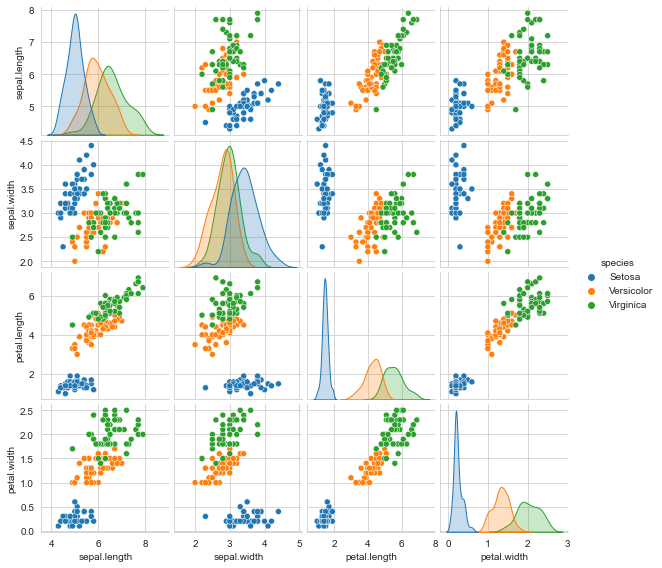

In [48]:
# plt.figure()
sns.pairplot(data, hue = "species")
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [34]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy', round(accuracy, 2))

Accuracy 97.78


In [29]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

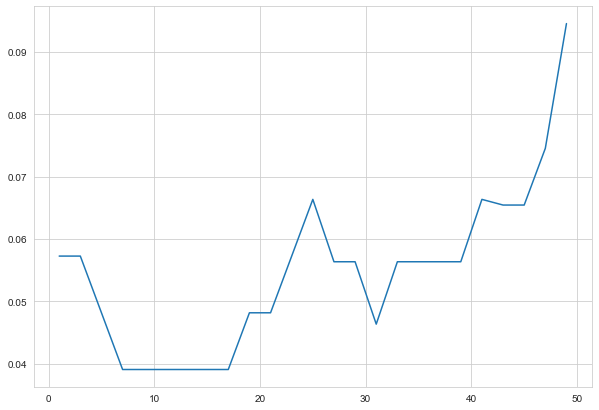

In [40]:
MSE = [1 - x for x in cv_scores]

# plt.figure()
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [49]:
best_k = k_list[MSE.index(min(MSE))]
print("Best neighbors value is %d." % best_k)

Best neighbors value is 7.


## retraining the model with K = 7

In [41]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [43]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy', round(accuracy, 2))

Accuracy 97.78
